# Image Processing in Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Import the modules from skimage
from skimage import data, color

# Import the otsu threshold function
from skimage.filters import threshold_otsu

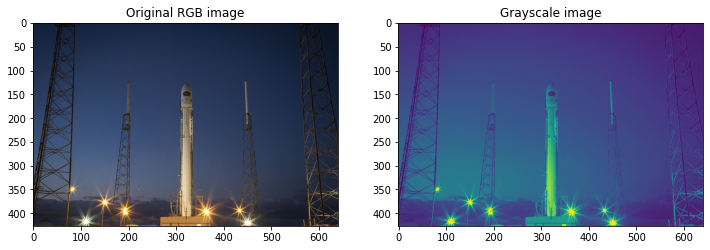

In [23]:
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

# show original image
ax[0].imshow(rocket)
ax[0].set_title('Original RGB image')

# Show the grayscale image
ax[1].imshow(gray_scaled_rocket)
ax[1].set_title('Grayscale image')

plt.show()

Great! the rocket image has been converted to grayscale. For many applications of image processing, color information doesn't help us identify important edges or other features.

In [30]:
rocket[:, :, 0]

array([[ 17,  17,  17, ...,   8,   8,   7],
       [ 17,  17,  17, ...,   8,   8,   8],
       [ 18,  18,  18, ...,   8,   8,   8],
       ...,
       [ 27,  29,  20, ..., 136, 186, 173],
       [ 26,  29,  30, ..., 103,  97,  76],
       [ 26,  29,  40, ...,  82,  79,  83]], dtype=uint8)

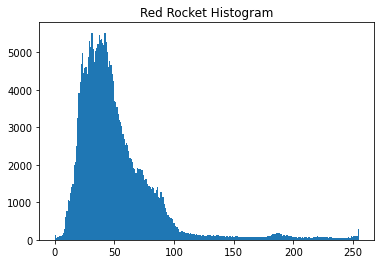

In [35]:
# Obtain the red channel
red_rocket = rocket[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Rocket Histogram')
plt.show()

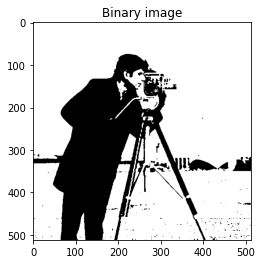

In [42]:
camera_img = data.camera()

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(camera_img)

# Apply thresholding to the image
binary = camera_img > thresh

# Show the image
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Binary image')
plt.show()

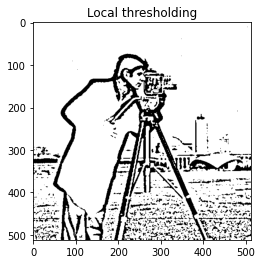

In [43]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(camera_img, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = camera_img >= local_thresh

# Show the binary image
plt.imshow(binary_local, cmap=plt.cm.gray)
plt.title('Local thresholding')
plt.show()

Local thresholding should be used instead of global if the image has a wide variation of background intensity.

<ipython-input-45-4c2ccb676468>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale = color.rgb2gray(camera_img)


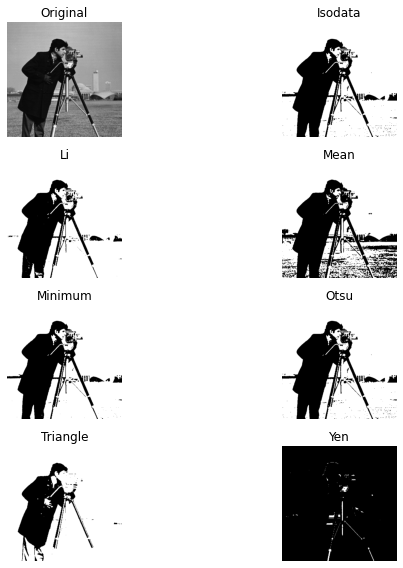

In [45]:
# Import the try all function
from skimage.filters import try_all_threshold


# Turn the fruits_image to grayscale
grayscale = color.rgb2gray(camera_img)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, figsize=(10, 8), verbose=False)

# Show the resulting plots
plt.show()

Nice! As you see, this image works good with some global thresholding methods (like the "Isodata" and "Minimum") and not so well in others, (like the "Yen").

<ipython-input-54-f38a389970c7>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grass_image_gray = color.rgb2gray(grass_img)


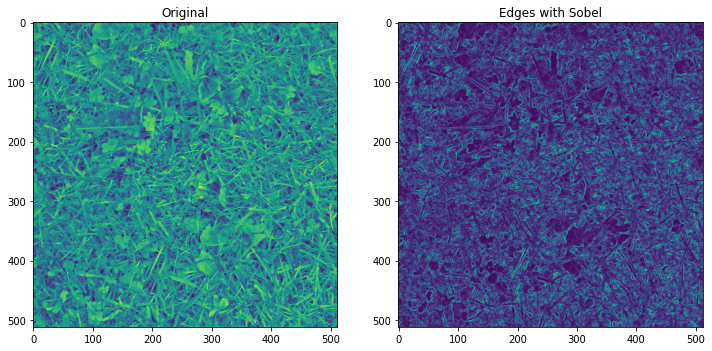

In [54]:
grass_img = data.grass()

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
grass_image_gray = color.rgb2gray(grass_img)

# Apply edge detection filter
edge_sobel = sobel(grass_image_gray)

# Show original and resulting image to compare
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

# show original image
ax[0].imshow(grass_img)
ax[0].set_title('Original')

# Show the grayscale image
ax[1].imshow(edge_sobel)
ax[1].set_title('Edges with Sobel')

plt.show()

We've succesfully detected the edges in the image.
As seen, the edges of all the figures in the scene are highlighted.

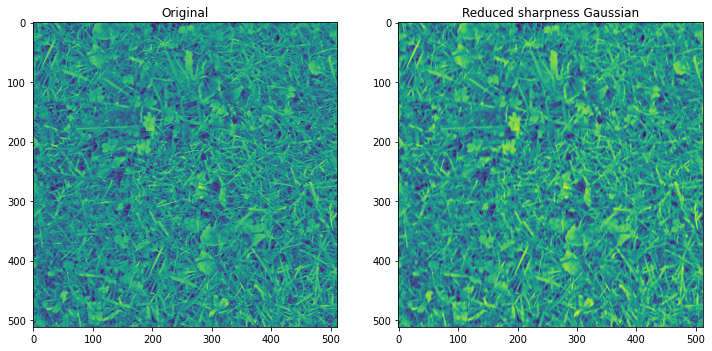

In [68]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(grass_img, multichannel=True)

# Show original and resulting image to compare
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

# show original image
ax[0].imshow(grass_img)
ax[0].set_title('Original')

# Show the grayscale image
ax[1].imshow(gaussian_image)
ax[1].set_title('Reduced sharpness Gaussian')

plt.show()

Excessive sharpness in the image has been removed successfully

In [86]:
def show_image(img, img_text, cmap=plt.cm.gray):
    # Show the image
    plt.imshow(img, cmap=cmap)
    plt.title(img_text)
    plt.show()

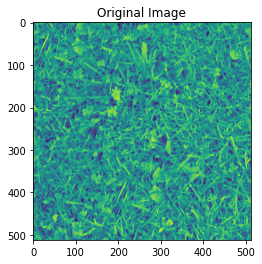

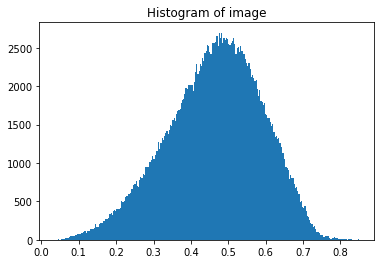

In [94]:
# Importing the exposure/contrast module
from skimage import exposure

# Show original image and its histogram
show_image(gaussian_image, 'Original Image', cmap=None)

plt.title('Histogram of image')
plt.hist(gaussian_image.ravel(), bins=256)
plt.show()


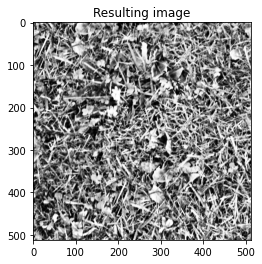

In [95]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(gaussian_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

In [110]:
def show_image(img, img_text, img_1, img_1_text):
    # Show the original and resulting image
    fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

    ax[0].imshow(img)
    ax[0].set_title(img_text)

    ax[1].imshow(img_1)
    ax[1].set_title(img_1_text)
    plt.show()

In [96]:
coffee = data.coffee()

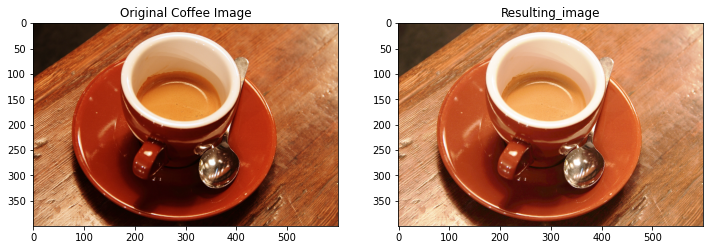

In [112]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =   exposure.equalize_hist(coffee)

# Show the original and resulting image

show_image(coffee, 'Original Coffee Image', image_eq, 'Resulting_image')

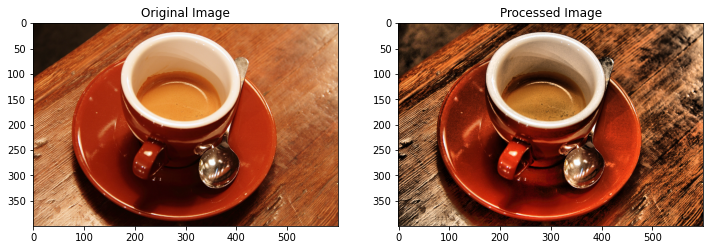

In [113]:
# Load the image
original_image = coffee

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image, 'Original Image', adapthist_eq_image, 'Processed Image')

The contrast of the image has been increased using an algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. 

Local details can therefore be enhanced even in regions that are darker or lighter than the rest of the image.

In [124]:
# Load image for processing
cat_img = plt.imread('images/image_cat.jpg')

In [133]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale, resize

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(cat_img, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=bool , multichannel=True)

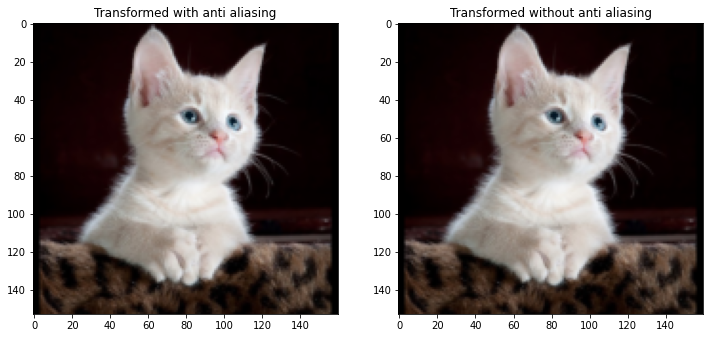

In [134]:
# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=None , multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing", 
           rescaled_without_aa, "Transformed without anti aliasing")

The anti aliasing filter prevents the poor pixelation effect to happen, making it look better but also less sharp

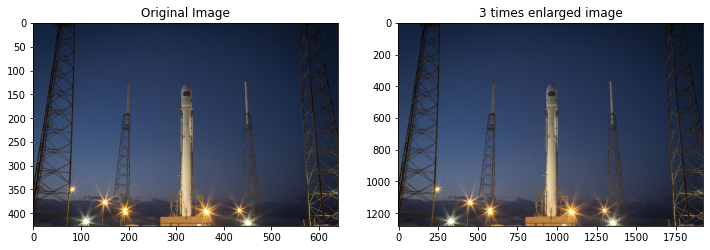

In [130]:
# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket, 'Original Image',
           enlarged_rocket_image, "3 times enlarged image")

The image went from being 600 pixels wide to over 1750 and it still does not look poorly pixelated

In [131]:
# load image for processing
dogs_banner = plt.imread('images/dogs_banner.jpg')

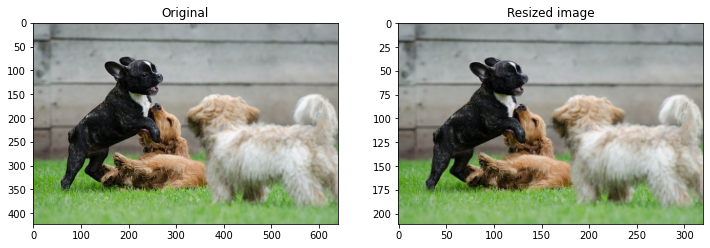

In [135]:
# Set proportional height and width so it is half its size
height = int(dogs_banner.shape[0] / 2.0)
width = int(dogs_banner.shape[1] / 2.0)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, 'Original', image_resized, 'Resized image')

The image is now compressed and ready. We can use this code for future images that are uploaded to the website

In [137]:
# Import the morphology module
from skimage import morphology

# load image
upper_r_image = plt.imread('images/r5.png')

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
#show_image(upper_r_image, 'Original', eroded_image_shape, 'Eroded image')

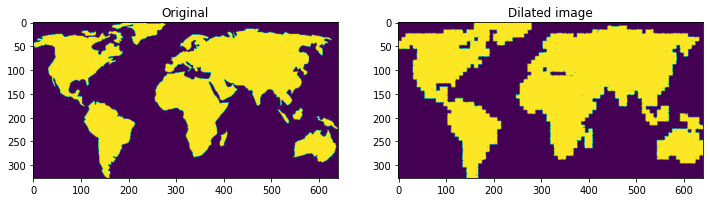

In [140]:
# load image
world_image = plt.imread('images/world_image_binary.jpg')

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original', dilated_image, 'Dilated image')

The noise of the segmented image was removed and now it's more uniform.

# Image Restoration

In [149]:
# load image
defect_image = plt.imread('images/defect_image.png')
image_with_logo = plt.imread('images/logo.png')

In [150]:
# Importing the module from restoration
from skimage.restoration import inpaint

#mask = get_mask(defect_image)

# Apply the restoration function to the image using the mask
#restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

# Show the defective image
#show_image(defect_image, 'Image to restore', restored_image, 'Restored Image')

You restored the image successfully. The image looks a lot better now. You can handle colored images that have several missing areas.

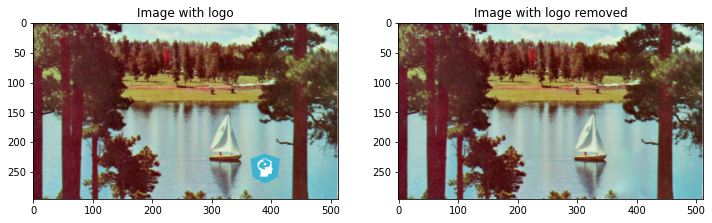

In [151]:
# Importing the module from restoration
from skimage.restoration import inpaint

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, 
                                                mask, 
                                                multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo', image_logo_removed, 'Image with logo removed')

# Processing Images with Noise

In [159]:
# load image
fruit_image = plt.imread('images/fruits_square.jpg')
noisy_image = plt.imread('images/miny.jpeg')
landscape_image = plt.imread('images/noise-noisy-nature.jpg')

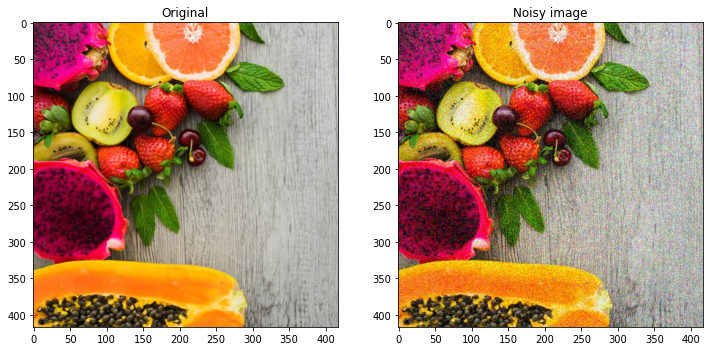

In [155]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original', noisy_image, 'Noisy image')

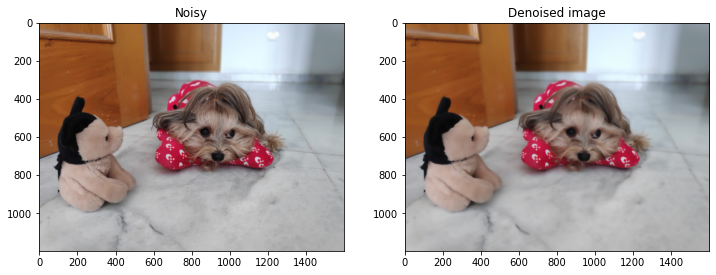

In [158]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy', denoised_image, 'Denoised image')

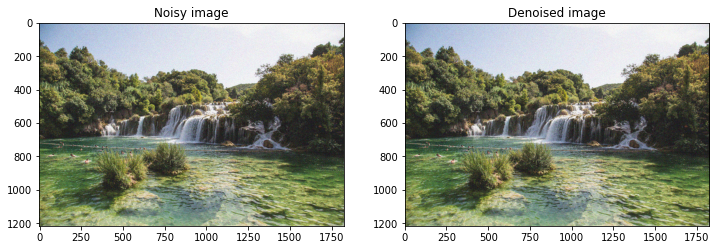

In [161]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image', denoised_image, 'Denoised image')

In [192]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively  
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

<ipython-input-166-2805120b3aa6>:11: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments= 400)
<ipython-input-166-2805120b3aa6>:14: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind='avg')


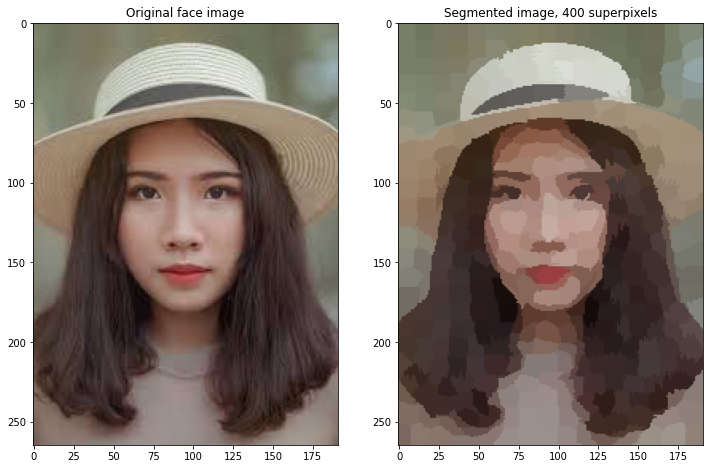

In [166]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# load image 
face_image = plt.imread('images/chinese.jpg')

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(face_image, 'Original face image', segmented_image, 
           "Segmented image, 400 superpixels")

# Detecting Image Edges

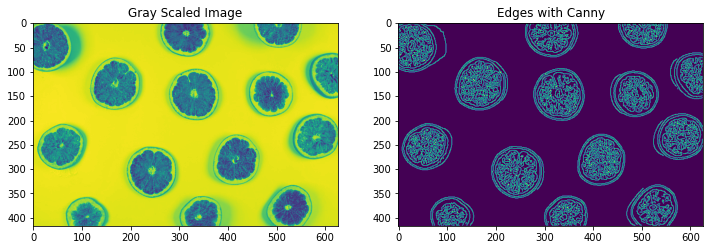

In [169]:
# Import the canny edge detector 
from skimage.feature import canny

# load image
grapefruit = plt.imread('images/toronjas.jpg')

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(grapefruit, 'Gray Scaled Image', canny_edges, "Edges with Canny")

We can see the shapes and details of the grapefruits of the original image being highlighted

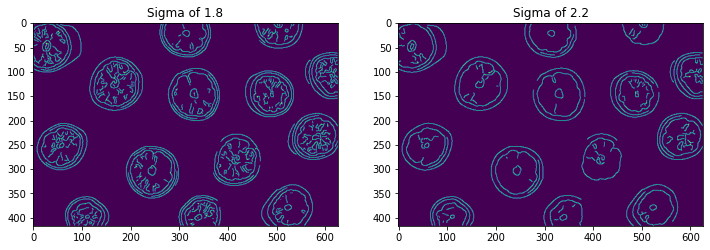

In [170]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8", edges_2_2, "Sigma of 2.2")

The bigger the sigma value, the less edges are detected because of the gaussian filter pre applied.

In [176]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')  
    plt.title(title)   
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)  
    plt.axis('off')
    plt.show()

<ipython-input-177-7216013a8a25>:14: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  coords = corner_peaks(measure_image, min_distance=2)


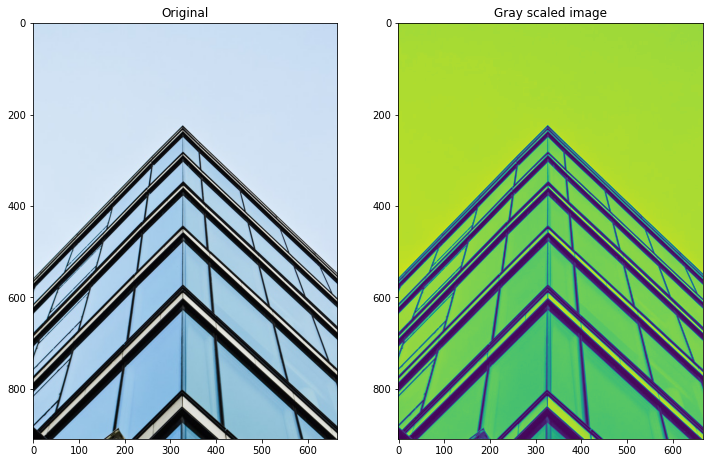

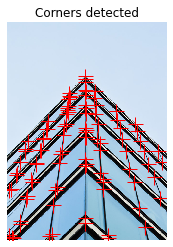

In [177]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# load image
building_image = plt.imread('images/corners_building_top.jpg')

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original", building_image_gray, 'Gray scaled image')
show_image_with_corners(building_image, coords)

# Face Detection

In [179]:
def show_detected_face(result, detected, title="Face image"):
    plt.figure()   
    plt.imshow(result) 
    img_desc = plt.gca()   
    plt.set_cmap('gray')    
    plt.title(title)    
    plt.axis('off')  
    for patch in detected:      
             img_desc.add_patch(patches.Rectangle((patch['c'], patch['r']), 
                                                         patch['width'],
                                                         patch['height'],
                                                               fill=False,
                                                               color='r',
                                                  linewidth=2))   
    plt.show() 
    crop_face(result, detected)
                                                               

In [182]:
from skimage.feature import Cascade
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

#load image
night_image = plt.imread('images/face_det3.jpg')

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
#show_detected_face(night_image, detected)

# Multi Face Detection

In [183]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# load image
friends_image = plt.imread('images/face_det_friends22.jpg')

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
#show_detected_face(friends_image, detected)

In [185]:
profile_image = plt.imread('images/face_det9.jpg')
# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
#show_detected_face(segmented_image, detected)

<ipython-input-185-631182349127>:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(profile_image)
<ipython-input-185-631182349127>:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, profile_image, kind='avg')


# Real World Application (Privacy Protection)

Let's look at a real-world application of what you have learned.

In this exercise, you will detect human faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.

In [190]:
group_image = plt.imread('images/face_det25.jpg')
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10, 10), max_size=(100, 100))
# For each detected face
for d in detected: 
    pass
    # Obtain the face rectangle from detected coordinates
    #face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    #blurred_face = gaussian(face, multichannel=True, sigma = 8)
    
    # Merge this blurry face to our final image and show it
   # resulting_image = mergeBlurryFace(group_image, blurred_face) 
#show_image(resulting_image, "Blurred faces")

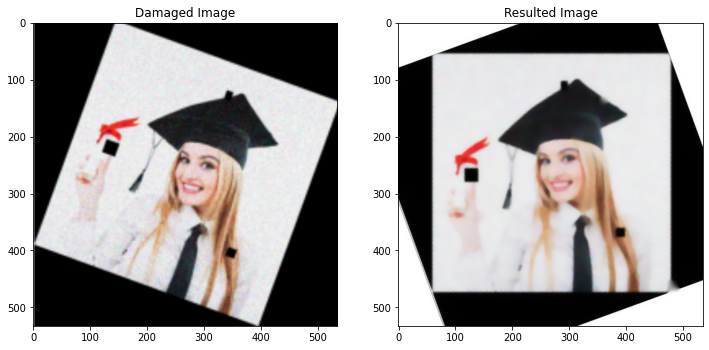

In [198]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage.transform import rotate

# load image
damaged_image = plt.imread('images/sally.png')

# Transform the image so it's not rotated
upright_img = rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(damaged_image, 'Damaged Image', result, 'Resulted Image')